In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [9]:
data_path = "/home/qwas/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1/spam_ham_dataset.csv"

In [3]:
spam_ham_dataset = pd.read_csv(data_path)

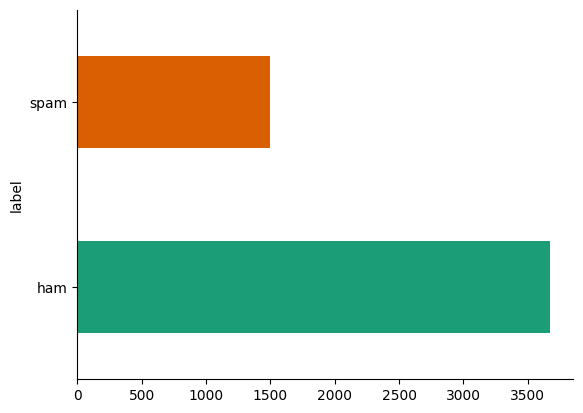

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
spam_ham_dataset.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam_ham_dataset['text']) 
Y = spam_ham_dataset['label_num'].values

In [6]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1, random_state=42)

In [ ]:

model = LogisticRegression(solver="sag")
model.fit(X_train, Y_train)
train_prediction = model.predict(X_train)

val_prediction = model.predict(X_val)
val_accuracy = accuracy_score(val_prediction, Y_val)

print('Accuracy for Validation is:', val_accuracy * 100)

Accuracy for Validation is: 91.06280193236715


/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_prediction, Y_test)
print('Accuracy for Testing is:', test_accuracy * 100)

Accuracy for Testing is: 90.14492753623189


In [ ]:
recall_scor = recall_score(test_prediction, Y_test)
f1_scor = f1_score(test_prediction, Y_test)

print(f'precision score: {prec_scor}')
print(f'recall score: {recall_scor}')
print(f'f1 score: {f1_scor}')

print(confusion_matrix(train_prediction, Y_train))


precision score: 0.689419795221843
recall score: 0.9483568075117371
f1 score: 0.7984189723320159
[[2591  303]
 [  46  782]]
[[731  91]
 [ 11 202]]


In [10]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

all_stop_words = set(stopwords.words('english'))
all_stop_words

[nltk_data] Downloading package stopwords to /home/qwas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Smote oversampling

In [11]:
from imblearn.over_sampling import SMOTE

# Застосовуємо SMOTE до X_train та Y_train
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [12]:
model = LogisticRegression(solver="sag")
model.fit(X_train_resampled, Y_train_resampled)
train_prediction = model.predict(X_train)

val_prediction = model.predict(X_val)
val_accuracy = accuracy_score(val_prediction, Y_val)

print('Accuracy for Validation is:', val_accuracy * 100)

Accuracy for Validation is: 93.71980676328504


/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_prediction, Y_test)
print('Accuracy for Testing is:', test_accuracy * 100)

Accuracy for Testing is: 95.3623188405797


pretty cool

In [14]:
recall_scor = recall_score(test_prediction, Y_test)
f1_scor = f1_score(test_prediction, Y_test)

print(f'precision score: {prec_scor}')
print(f'recall score: {recall_scor}')
print(f'f1 score: {f1_scor}')

print(confusion_matrix(train_prediction, Y_train))

precision score: 0.689419795221843
recall score: 0.886435331230284
f1 score: 0.921311475409836
[[2480   20]
 [ 157 1065]]


# Undersampling

In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Застосовуємо undersampling до X_train та Y_train
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

In [16]:
model = LogisticRegression(solver="sag")
model.fit(X_train_resampled, Y_train_resampled)
train_prediction = model.predict(X_train)

val_prediction = model.predict(X_val)
val_accuracy = accuracy_score(val_prediction, Y_val)

print('Accuracy for Validation is:', val_accuracy * 100)

Accuracy for Validation is: 94.92753623188406


/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_prediction, Y_test)
print('Accuracy for Testing is:', test_accuracy * 100)

Accuracy for Testing is: 94.68599033816425


In [18]:
recall_scor = recall_score(test_prediction, Y_test)
f1_scor = f1_score(test_prediction, Y_test)

print(f'precision score: {prec_scor}')
print(f'recall score: {recall_scor}')
print(f'f1 score: {f1_scor}')

print(confusion_matrix(train_prediction, Y_train))

precision score: 0.689419795221843
recall score: 0.8940397350993378
f1 score: 0.907563025210084
[[2469   54]
 [ 168 1031]]


pretty cool

# Combination

In [20]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, Y_train_resampled = smote_enn.fit_resample(X_train, Y_train)

In [21]:
model = LogisticRegression(solver="sag")
model.fit(X_train_resampled, Y_train_resampled)
train_prediction = model.predict(X_train)

val_prediction = model.predict(X_val)
val_accuracy = accuracy_score(val_prediction, Y_val)

print('Accuracy for Validation is:', val_accuracy * 100)

Accuracy for Validation is: 83.09178743961353


/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_prediction, Y_test)
print('Accuracy for Testing is:', test_accuracy * 100)

Accuracy for Testing is: 84.92753623188406


In [23]:
recall_scor = recall_score(test_prediction, Y_test)
f1_scor = f1_score(test_prediction, Y_test)

print(f'precision score: {prec_scor}')
print(f'recall score: {recall_scor}')
print(f'f1 score: {f1_scor}')

print(confusion_matrix(train_prediction, Y_train))

precision score: 0.689419795221843
recall score: 0.6525612472160356
f1 score: 0.7897574123989218
[[2025    0]
 [ 612 1085]]


pretty bad

# Best run

In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

In [6]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [7]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [10]:
Email_dataset = pd.read_csv(data_path)

In [11]:
Email_dataset = Email_dataset.drop('Unnamed: 0', axis=1)
Email_dataset = Email_dataset.drop('label', axis=1)

In [12]:
subjects = []
for i in range(len(Email_dataset)):
    ln = Email_dataset["text"][i]
    line = ""
    for i in ln:
        if(i == '\r'):
            break
        line = line + i
    line = line.replace("Subject" , "")
    subjects.append(line)

In [13]:
Email_dataset['Subject'] = subjects

In [14]:
Email_dataset.columns = ["Email_text" , "Labels" , "Email_Subject"]

In [16]:
Email_dataset.head()

,Email_text,Labels,Email_Subject
0,Subject: enron methanol ; meter # : 988291\r\n...,0,: enron methanol ; meter # : 988291
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,": hpl nom for january 9 , 2001"
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,: neon retreat
3,"Subject: photoshop , windows , office . cheap ...",1,": photoshop , windows , office . cheap . main ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,: re : indian springs


In [17]:
Email_dataset = swap_columns(Email_dataset, 'Labels', 'Email_Subject')

In [18]:
Email_dataset.head()

,Email_text,Email_Subject,Labels
0,Subject: enron methanol ; meter # : 988291\r\n...,: enron methanol ; meter # : 988291,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",": hpl nom for january 9 , 2001",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",: neon retreat,0
3,"Subject: photoshop , windows , office . cheap ...",": photoshop , windows , office . cheap . main ...",1
4,Subject: re : indian springs\r\nthis deal is t...,: re : indian springs,0


In [48]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/qwas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/qwas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/qwas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [42]:
Email_dataset['Combined_Text'] = Email_dataset['Email_Subject'] + " " + Email_dataset['Email_text']

In [46]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [49]:
Email_dataset['Cleaned_Text'] = Email_dataset['Combined_Text'].apply(preprocess_text)

In [51]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X = tfidf_vectorizer.fit_transform(Email_dataset['Cleaned_Text']).toarray()

In [52]:
y = Email_dataset['Labels'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f7693acd760>
Traceback (most recent call last):
  File "/home/qwas/miniconda3/lib/python3.12/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/qwas/miniconda3/lib/python3.12/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/home/qwas/miniconda3/lib/python3.12/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/qwas/miniconda3/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /home/qwas/miniconda3/lib/py

In [56]:
print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_smote.shape, y_train_smote.shape)

Before SMOTE: (4136, 500) (4136,)
After SMOTE: (5860, 500) (5860,)


In [63]:
model = LogisticRegression(solver="sag")
model.fit(X_train_smote, y_train_smote)
train_prediction = model.predict(X_train)

In [65]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_prediction, y_test)
print('Accuracy for Testing is:', test_accuracy * 100)

Accuracy for Testing is: 95.84541062801932


In [68]:
recall_scor = recall_score(test_prediction, y_test)
f1_scor = f1_score(test_prediction, y_test)
precision_score = precision_score(test_prediction, y_test)

print(f'precision score: {precision_score}')
print(f'recall score: {recall_scor}')
print(f'f1 score: {f1_scor}')

print(confusion_matrix(train_prediction, y_train))

precision score: 0.9692832764505119
recall score: 0.8930817610062893
f1 score: 0.9296235679214403
[[2802    6]
 [ 128 1200]]
